In [1]:
import sys
sys.path.append("../")

import tensorflow as tf
import numpy as np
from cleverhans.utils_keras import KerasModelWrapper
from IJCAI19.model.KerasModelDef import finetune_xception_19, preprocess_input
import keras
from IJCAI19.module.utils import *
# from cleverhans.attacks import MomentumIterativeMethod
from cleverhans.attacks import FastGradientMethod
from keras.models import load_model
# from IJCAI19.module.gs_mim import GradSmoothMomentumIterativeMethod


Using TensorFlow backend.


In [2]:
batch_shape = [1,299,299,3]
img_loader = ImageLoader('../../official_data/dev_data/', batch_shape, targetlabel=False, label_size=110, format='png', label_file='dev.csv')

In [3]:
sess = tf.Session()
with sess.as_default():
    net = load_model("../IJCAI19/weight/xception_19/keras_xception_19.h5")
    model = KerasModelWrapper(net)
    fgsm = FastGradientMethod(model, sess=sess)
    fgsm_params = {'eps': 0.3,
                     'clip_min': -1.,
                     'clip_max': 1.}

    x = tf.placeholder(tf.float32, shape=(None, 299, 299,3))
    adv_x = fgsm.generate(x, **fgsm_params)
    
    _,X,Y = next(img_loader)
    X = preprocess_input(X)
    Xadv = sess.run(adv_x, feed_dict={x:X})

IndexError: index 1 is out of bounds for axis 0 with size 1

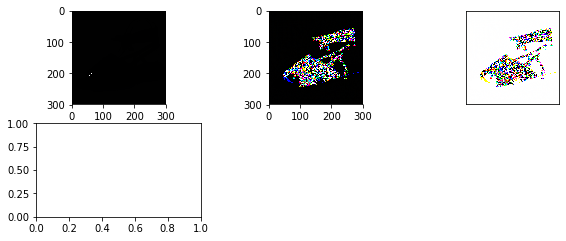

In [4]:
plot_images(X, Xadv)